In [1]:
# https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/

In [12]:
# import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# for other styles see 
# https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [13]:
#Get the stock symbols
assets = ['GOOG']

In [14]:
# Get the portfolio strting date
stockStartDate = '2013-01-01'

In [15]:
# Get the ending date for the portdfolio (today)
today = datetime.today().strftime('%Y-%m-%d')
print(today)

2020-05-27


In [16]:
# Create a data frame to store the adjusted close price
# of the stocks in the porfolio
df = pd.DataFrame()

for stock in assets:
    df[stock] = web.DataReader(stock, 'yahoo', start = stockStartDate, end = today)['Adj Close']

In [17]:
df.head()

,GOOG
Date,
2013-01-02,360.274597
2013-01-03,360.483826
2013-01-04,367.607117
2013-01-07,366.003143
2013-01-08,365.280823


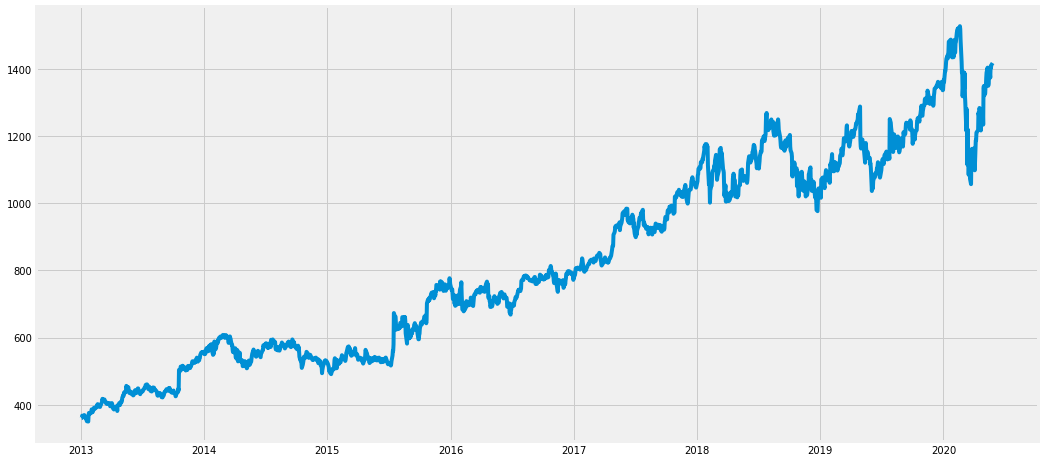

In [18]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df, label='Close Price history')

In [23]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


In [28]:
train = df.values[0:1490,:]
valid = df.values[1490:,:]

In [32]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [33]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 63s - loss: 0.0010


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [34]:
#for plotting
train = df.values[0:1490,:]
valid = df.values[1490:,:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

NameError: name 'closing_price' is not defined